In [ ]:
import tensorflow as tf

In [ ]:
# More imports
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

# XOR 3D problem
def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance
#   y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [ ]:
# Try a linear model first - note: it is classification now!
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# train the network
r = model.fit(
  X, Y,
  epochs=100,
  validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 2s 10ms/step - loss: 0.7496 - accuracy: 0.5104 - val_loss: 0.7074 - val_accuracy: 0.4908
Epoch 2/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6962 - accuracy: 0.5128 - val_loss: 0.6974 - val_accuracy: 0.4936
Epoch 3/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.5080 - val_loss: 0.6955 - val_accuracy: 0.5040
Epoch 4/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5104 - val_loss: 0.6948 - val_accuracy: 0.5040
Epoch 5/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.5028 - val_loss: 0.6954 - val_accuracy: 0.4980
Epoch 6/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.5188 - val_loss: 0.6947 - val_accuracy: 0.4948
Epoch 7/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.5136 - val_loss: 0.6953 - val_accuracy: 0.5048
Epoch 8/100


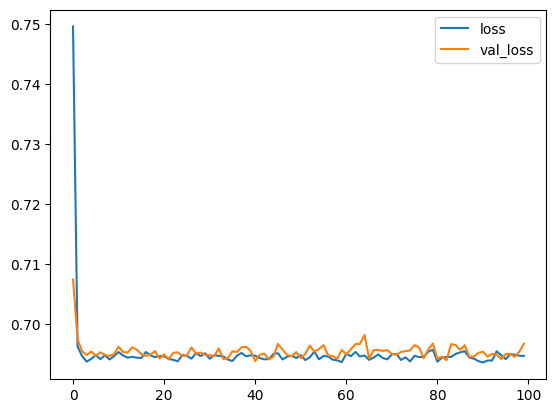

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

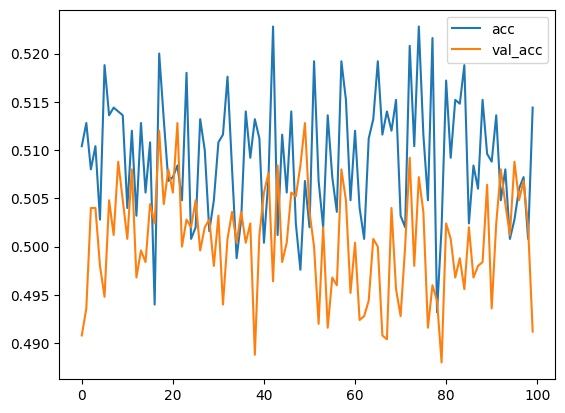

In [ ]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Now try a simple RNN
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  # optimizer='rmsprop',
#   optimizer='adam',
  optimizer=Adam(learning_rate=0.01),
  # optimizer=SGD(learning_rate=0.1, momentum=0.9),
  metrics=['accuracy'],
)

In [ ]:
# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 6s 21ms/step - loss: 0.6966 - accuracy: 0.5132 - val_loss: 0.6879 - val_accuracy: 0.5812
Epoch 2/200
79/79 [==============================] - 1s 13ms/step - loss: 0.6703 - accuracy: 0.5980 - val_loss: 0.6463 - val_accuracy: 0.6504
Epoch 3/200
79/79 [==============================] - 1s 15ms/step - loss: 0.5905 - accuracy: 0.7372 - val_loss: 0.5206 - val_accuracy: 0.8076
Epoch 4/200
79/79 [==============================] - 1s 13ms/step - loss: 0.4464 - accuracy: 0.8580 - val_loss: 0.3841 - val_accuracy: 0.8804
Epoch 5/200
79/79 [==============================] - 1s 8ms/step - loss: 0.3332 - accuracy: 0.9024 - val_loss: 0.3009 - val_accuracy: 0.9160
Epoch 6/200
79/79 [==============================] - 1s 12ms/step - loss: 0.2620 - accuracy: 0.9280 - val_loss: 0.2442 - val_accuracy: 0.9336
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.2166 - accuracy: 0.9392 - val_loss: 0.2130 - val_accuracy: 0.9412
Epoch 8/

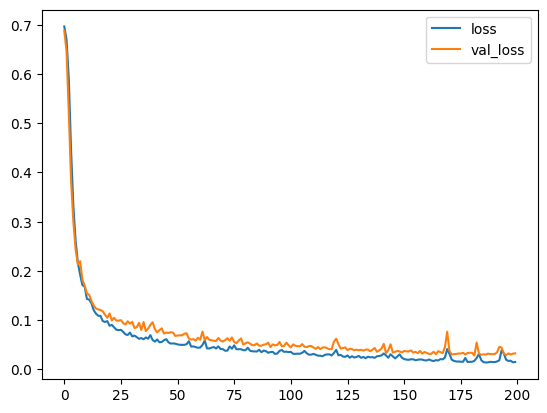

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

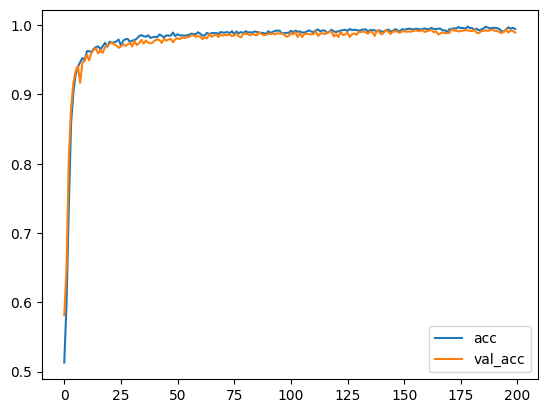

In [ ]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Now change to the long distance problem

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [ ]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 2s 9ms/step - loss: 0.7031 - accuracy: 0.5072 - val_loss: 0.6963 - val_accuracy: 0.5060
Epoch 2/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6957 - accuracy: 0.5052 - val_loss: 0.6978 - val_accuracy: 0.5060
Epoch 3/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6931 - accuracy: 0.5112 - val_loss: 0.6953 - val_accuracy: 0.4964
Epoch 4/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6926 - accuracy: 0.5188 - val_loss: 0.6955 - val_accuracy: 0.5012
Epoch 5/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6926 - accuracy: 0.5320 - val_loss: 0.6949 - val_accuracy: 0.5060
Epoch 6/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6786 - accuracy: 0.5712 - val_loss: 0.6602 - val_accuracy: 0.5980
Epoch 7/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6419 - accuracy: 0.6408 - val_loss: 0.6383 - val_accuracy: 0.6488
Epoch 8/2

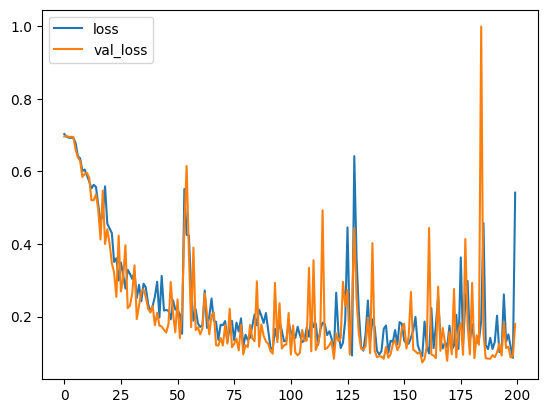

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

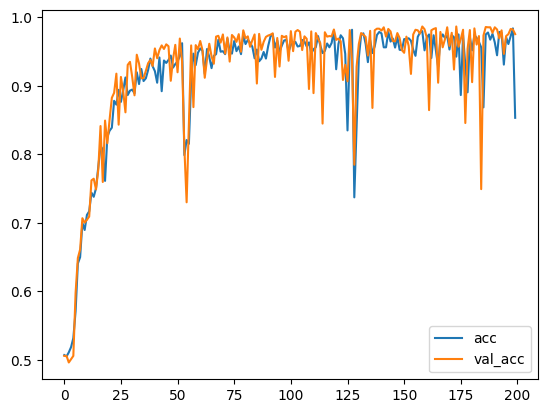

In [ ]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 6s 47ms/step - loss: 0.6944 - accuracy: 0.4868 - val_loss: 0.6932 - val_accuracy: 0.5008
Epoch 2/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6931 - accuracy: 0.5056 - val_loss: 0.6937 - val_accuracy: 0.4952
Epoch 3/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6931 - accuracy: 0.5064 - val_loss: 0.6930 - val_accuracy: 0.5072
Epoch 4/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6928 - accuracy: 0.5116 - val_loss: 0.6937 - val_accuracy: 0.5008
Epoch 5/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6926 - accuracy: 0.5060 - val_loss: 0.6934 - val_accuracy: 0.5112
Epoch 6/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6940 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5052
Epoch 7/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6943 - accuracy: 0.5064 - val_loss: 0.6935 - val_accuracy: 0.5064
Epoch 8/2

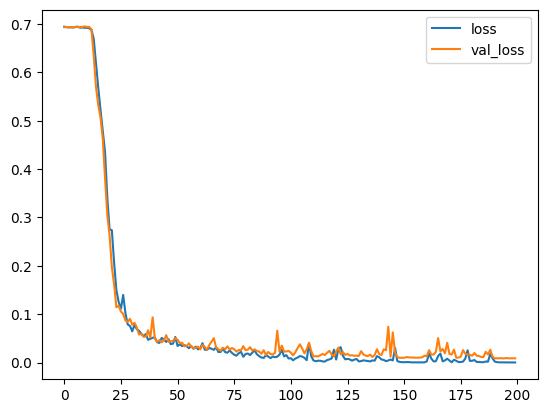

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

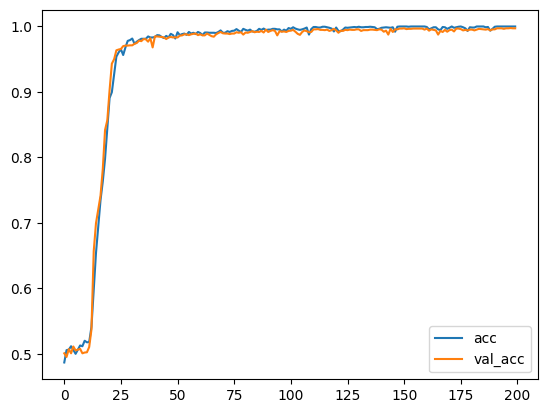

In [ ]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Make the problem harder by making T larger
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [ ]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(15)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 5s 33ms/step - loss: 0.6955 - accuracy: 0.4892 - val_loss: 0.6930 - val_accuracy: 0.4996
Epoch 2/400
79/79 [==============================] - 2s 21ms/step - loss: 0.6937 - accuracy: 0.4980 - val_loss: 0.6929 - val_accuracy: 0.5040
Epoch 3/400
79/79 [==============================] - 2s 21ms/step - loss: 0.6942 - accuracy: 0.5080 - val_loss: 0.6932 - val_accuracy: 0.5048
Epoch 4/400
79/79 [==============================] - 2s 21ms/step - loss: 0.6935 - accuracy: 0.5172 - val_loss: 0.6930 - val_accuracy: 0.5084
Epoch 5/400
79/79 [==============================] - 2s 28ms/step - loss: 0.6933 - accuracy: 0.4940 - val_loss: 0.6934 - val_accuracy: 0.4964
Epoch 6/400
79/79 [==============================] - 2s 29ms/step - loss: 0.6942 - accuracy: 0.4908 - val_loss: 0.6930 - val_accuracy: 0.5052
Epoch 7/400
79/79 [==============================] - 3s 40ms/step - loss: 0.6938 - accuracy: 0.4928 - val_loss: 0.6930 - val_accuracy: 0.5048
Epoch 

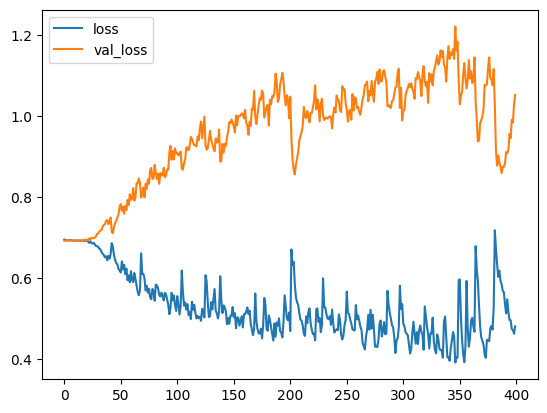

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

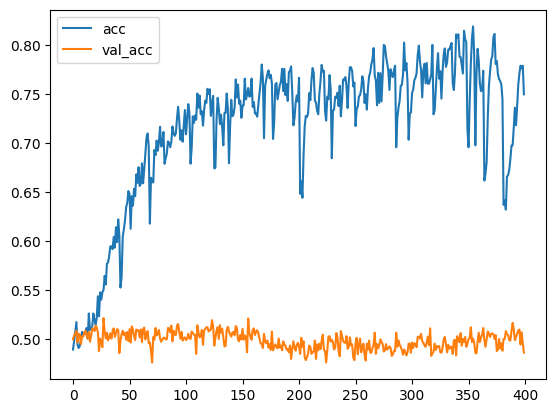

In [ ]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Now try a LSTM with Global Max Pooling
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=100,
  validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 4s 28ms/step - loss: 0.6946 - accuracy: 0.4908 - val_loss: 0.6935 - val_accuracy: 0.4900
Epoch 2/100
79/79 [==============================] - 2s 25ms/step - loss: 0.6937 - accuracy: 0.5028 - val_loss: 0.6942 - val_accuracy: 0.4892
Epoch 3/100
79/79 [==============================] - 2s 20ms/step - loss: 0.6933 - accuracy: 0.5108 - val_loss: 0.6930 - val_accuracy: 0.5104
Epoch 4/100
79/79 [==============================] - 1s 16ms/step - loss: 0.6932 - accuracy: 0.5108 - val_loss: 0.6931 - val_accuracy: 0.5180
Epoch 5/100
79/79 [==============================] - 2s 20ms/step - loss: 0.6921 - accuracy: 0.5240 - val_loss: 0.6930 - val_accuracy: 0.4984
Epoch 6/100
79/79 [==============================] - 2s 21ms/step - loss: 0.6919 - accuracy: 0.5184 - val_loss: 0.6929 - val_accuracy: 0.5020
Epoch 7/100
79/79 [==============================] - 2s 21ms/step - loss: 0.6899 - accuracy: 0.5180 - val_loss: 0.6911 - val_accuracy: 0.5084
Epoch 

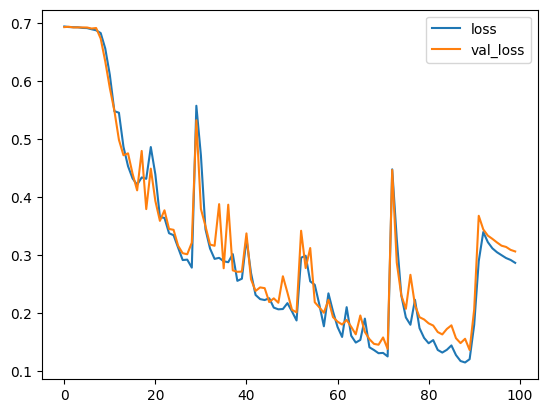

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

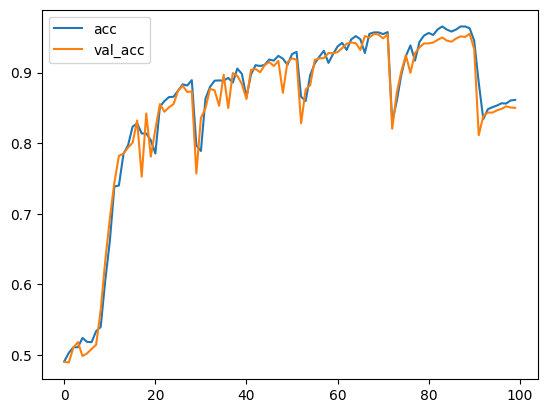

In [ ]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()